# 结果分析

In [1]:
# 设置工作目录
import os
from tqdm import tqdm
os.chdir("/mnt/f/SMTarRNA_total_results/total_dataset_results/total_dataset_results")

# hpc
# os.chdir("/public/home/hpc192311018/Huabei/project/SMTARRNA-sync/SMTarRNA/data/total_dataset_results")

# 设置python工作目录
import sys
import pandas as pd

def create_zinc_id(id: int):
    return 'ZINC'+str(int(id + 1e12))[1:]

sys.path.append("/home/huabei/projects/SMTarRNA")
os.listdir()

['chemfp_clustering',
 'data_3a6p_zinc_id_smiles_frame.csv',
 'data_4z4c_zinc_id_smiles_frame.csv',
 'data_4z4d_zinc_id_smiles_frame.csv',
 'data_6cbd_zinc_id_smiles_frame.csv',
 'dock_interaction_analysis',
 'fps',
 'infer_pt_results',
 'smiles',
 'smiles.tar.gz',
 'top_0_001',
 'zinc_id_smiles_frame.csv']

In [7]:
# 统计每个文件夹下的结果
import torch
# folder = '3a6p'
folder = '4z4d'
file_lists = os.listdir(folder)[:50]

/home/huabei/mambaforge/envs/hydra-pl/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
data_ = torch.load(os.path.join(folder, file_lists[0]))
data_ : tuple
data_[0][:5], data_[1][:5]


(array([[-7.3133545 , -8.59358   , -0.2873414 ,  1.2609668 , -0.31223962],
        [-7.285434  , -8.599607  , -0.3650469 ,  1.3001853 , -0.37317836],
        [-6.8682747 , -8.317631  , -0.3393728 ,  1.4387854 , -0.3547733 ],
        [-6.867611  , -8.310375  , -0.34464687,  1.4341266 , -0.35637733],
        [-7.2664523 , -8.594442  , -0.43773767,  1.3187728 , -0.44468275]],
       dtype=float32),
 array([843459601, 843459605, 843461702, 843461700, 843459607]))

In [9]:
# len('ZINC000000001084')


In [2]:
# 将data_(n, 5)的第一列和data_(1, )的第一列拼接起来
import numpy as np
def get_data(folder, file_lists):
    data = []
    for file in tqdm(file_lists):
        data_ = torch.load(os.path.join(folder, file))
        data_ = np.concatenate([data_[1].reshape(-1, 1), data_[0][:, 0].reshape(-1, 1)], axis=1)
        data.append(data_)
    data = np.concatenate(data, axis=0)
    return data
def create_zinc_id(id: int):
    return 'ZINC'+str(int(id + 1e12))[1:]


In [ ]:
total_data = get_data(folder, file_lists)
# data_[0][:, 0].shape, data_[1].shape


In [11]:
# 依据total_data第二列获取top千分之一的数据
def get_top_data(total_data, top=0.001):
    top_data = total_data[total_data[:, 1].argsort()][:int(total_data.shape[0]*top)]
    return top_data
top_data = get_top_data(total_data)

## 使用脚本下载smiles

## 聚合分别下载的smiles

In [ ]:
folder = 'smiles'
files = os.listdir(folder)
smiles_dict = dict()
for file in tqdm(files):
    # print(file)
    with open(os.path.join(folder, file), 'r', errors='ignore') as f:

            for line_ in f.readlines():
                # print(line_)
                # line_ = str(line_, encoding='utf-8')
                # line_ = str(line_, encoding='utf-8')
                try:
                    line = line_.strip().split()
                    smiles_dict[line[1]] = line[0]
                # break
                except:
                    print(file)
                    # print(line_)
                    # print(line_.decode('utf-8'))
                    continue
    # break


## 保存为dataframe

In [21]:
zinc_id_smiles_frame = pd.DataFrame(smiles_dict.items(), columns=['zinc_id', 'smiles'])
# 设置zinc_id为索引
# zinc_id_smiles_frame.set_index('zinc_id', inplace=True)
# 去除重复的zinc_id
zinc_id_smiles_frame.drop_duplicates(inplace=True)


In [23]:
zinc_id_smiles_frame.head()
# 保存
zinc_id_smiles_frame.to_csv('zinc_id_smiles_frame.csv', index=False)

In [24]:

zinc_id_smiles_frame.head()

,zinc_id,smiles
0,ZINC000541065243,Cc1ccc(NC(=O)N2CC=C(c3ccccc3F)C2)cc1-n1cnnn1
1,ZINC000826277901,Cc1ccc(-c2nn[nH]n2)cc1NC(=O)NC1(c2cccc(C#N)c2)CC1
2,ZINC000891289621,Cc1ccc(C)c(C2CCN(C(=O)c3cc4c(nc3O)CCCC4=O)CC2)c1
3,ZINC000811597825,O=C1COc2c(cccc2NC(=O)c2cc(-c3ccccn3)nc3ccccc23)N1
4,ZINC001136656412,O=C(c1cnc2[nH]ncc2c1)N1CCO[C@@H](c2nn[nH]n2)C1


## 索引出四个复合体分别的smiles

In [25]:
import torch
data_3a6p = torch.load('3a6p_top_data.pt')
data_4z4d = torch.load('4z4d_top_data.pt')
data_4z4c = torch.load('4z4c_top_data.pt')
data_6cbd = torch.load('6cbd_top_data.pt')

zinc_id_smiles_frame = pd.read_csv('zinc_id_smiles_frame.csv')

# 转换为dataframe
data_3a6p = pd.DataFrame(data_3a6p, columns=['zinc_id', 'score'])
data_4z4d = pd.DataFrame(data_4z4d, columns=['zinc_id', 'score'])
data_4z4c = pd.DataFrame(data_4z4c, columns=['zinc_id', 'score'])
data_6cbd = pd.DataFrame(data_6cbd, columns=['zinc_id', 'score'])


# 转换zinc id列为int
data_3a6p['zinc_id'] = data_3a6p['zinc_id'].apply(create_zinc_id)
# data_3a6p.set_index('zinc_id', inplace=True)
# 去除重复的zinc id
# data_3a6p.drop_duplicates(inplace=True)
data_4z4d['zinc_id'] = data_4z4d['zinc_id'].apply(create_zinc_id)
# data_4z4d.set_index('zinc_id', inplace=True)
# data_4z4d.drop_duplicates(inplace=True)
data_4z4c['zinc_id'] = data_4z4c['zinc_id'].apply(create_zinc_id)
# data_4z4c.set_index('zinc_id', inplace=True)
# data_4z4c.drop_duplicates(inplace=True)
data_6cbd['zinc_id'] = data_6cbd['zinc_id'].apply(create_zinc_id)
# data_6cbd.set_index('zinc_id', inplace=True)
# data_6cbd.drop_duplicates(inplace=True)

# 合并表格
data_3a6p_zinc_id_smiles_frame = pd.merge(data_3a6p, zinc_id_smiles_frame, on='zinc_id', how='inner')
data_3a6p_zinc_id_smiles_frame.drop_duplicates(subset=['zinc_id'], inplace=True)
# 保存数据
data_3a6p_zinc_id_smiles_frame.to_csv('data_3a6p_zinc_id_smiles_frame.csv', index=False)

data_4z4d_zinc_id_smiles_frame = pd.merge(data_4z4d, zinc_id_smiles_frame, on='zinc_id', how='inner')
data_4z4d_zinc_id_smiles_frame.drop_duplicates(subset=['zinc_id'], inplace=True)
data_4z4d_zinc_id_smiles_frame.to_csv('data_4z4d_zinc_id_smiles_frame.csv', index=False)

data_4z4c_zinc_id_smiles_frame = pd.merge(data_4z4c, zinc_id_smiles_frame, on='zinc_id', how='inner')
data_4z4c_zinc_id_smiles_frame.drop_duplicates(subset=['zinc_id'], inplace=True)
data_4z4c_zinc_id_smiles_frame.to_csv('data_4z4c_zinc_id_smiles_frame.csv', index=False)

data_6cbd_zinc_id_smiles_frame = pd.merge(data_6cbd, zinc_id_smiles_frame, on='zinc_id', how='inner')
data_6cbd_zinc_id_smiles_frame.drop_duplicates(subset=['zinc_id'], inplace=True)
data_6cbd_zinc_id_smiles_frame.to_csv('data_6cbd_zinc_id_smiles_frame.csv', index=False)

data_3a6p.shape, data_4z4d.shape, data_4z4c.shape, data_6cbd.shape

((564646, 2), (564646, 2), (564646, 2), (564646, 2))

In [18]:
data_3a6p_zinc_id_smiles_frame.head()


,zinc_id,score,smiles
0,ZINC000059597020,-11.560652,Fc1ccc(Nc2nc3nonc3nc2NNc2nc3nonc3nc2Nc2ccc(F)c...
1,ZINC000738432616,-10.720841,c1ccc2[nH]c(C3CCN(c4cc(-c5nn[nH]n5)nc5ccccc45)...
4,ZINC000823766411,-10.596564,c1ccc(-c2nnc3n2CCN(c2cc(-c4nn[nH]n4)nc4ccccc24...
7,ZINC000408721506,-10.580578,Cc1ccc(NN=c2[nH]c3nonc3[nH]c2=N/N=C\c2ccc(-c3c...
8,ZINC000408721249,-10.569624,Cc1ccc(NN=c2[nH]c3nonc3[nH]c2=N/N=C\c2ccc(-c3c...


## 聚类

In [2]:
# 读取数据
data_3a6p_zinc_id_smiles_frame = pd.read_csv('data_3a6p_zinc_id_smiles_frame.csv')
data_4z4d_zinc_id_smiles_frame = pd.read_csv('data_4z4d_zinc_id_smiles_frame.csv')
data_4z4c_zinc_id_smiles_frame = pd.read_csv('data_4z4c_zinc_id_smiles_frame.csv')
data_6cbd_zinc_id_smiles_frame = pd.read_csv('data_6cbd_zinc_id_smiles_frame.csv')

In [4]:
# 计算fps
data_3a6p_zinc_id_smiles_frame['fp'] = data_3a6p_zinc_id_smiles_frame['smiles'].apply(calFP)
print('3a6p')
data_4z4d_zinc_id_smiles_frame['fp'] = data_4z4d_zinc_id_smiles_frame['smiles'].apply(calFP)
print('4z4d')
data_4z4c_zinc_id_smiles_frame['fp'] = data_4z4c_zinc_id_smiles_frame['smiles'].apply(calFP)
print('4z4c')
data_6cbd_zinc_id_smiles_frame['fp'] = data_6cbd_zinc_id_smiles_frame['smiles'].apply(calFP)
print('6cbd')
# 去除None
data_3a6p_zinc_id_smiles_frame = data_3a6p_zinc_id_smiles_frame[data_3a6p_zinc_id_smiles_frame['fp'].notnull()]
data_4z4d_zinc_id_smiles_frame = data_4z4d_zinc_id_smiles_frame[data_4z4d_zinc_id_smiles_frame['fp'].notnull()]
data_4z4c_zinc_id_smiles_frame = data_4z4c_zinc_id_smiles_frame[data_4z4c_zinc_id_smiles_frame['fp'].notnull()]
data_6cbd_zinc_id_smiles_frame = data_6cbd_zinc_id_smiles_frame[data_6cbd_zinc_id_smiles_frame['fp'].notnull()]

[14:59:04] SMILES Parse Error: syntax error while parsing: K&npBn31O=C1Cc2cc(-c3noc(-c4cccc(NC(=O)c5ccco5)c4)n3)ccc2N1
[14:59:04] SMILES Parse Error: Failed parsing SMILES 'K&npBn31O=C1Cc2cc(-c3noc(-c4cccc(NC(=O)c5ccco5)c4)n3)ccc2N1' for input: 'K&npBn31O=C1Cc2cc(-c3noc(-c4cccc(NC(=O)c5ccco5)c4)n3)ccc2N1'
[14:59:06] SMILES Parse Error: extra open parentheses for input: 'Cc1nc(CNC(=O)c2ccc(=O)n(-c3ccccc3)nO=C([C@@H]1C[C@H]1c1cccnc1)N1CC[C@@H](Nc2nccnc2-c2nn[nH]n2)C1'
[14:59:07] SMILES Parse Error: syntax error while parsing: 
[14:59:07] SMILES Parse Error: Failed parsing SMILES '' for input: ''
[14:59:07] SMILES Parse Error: syntax error while parsing: F4O-!ҎaqsGMNH&
[14:59:07] SMILES Parse Error: Failed parsing SMILES 'F4O-!ҎaqsGMNH&' for input: 'F4O-!ҎaqsGMNH&'
[14:59:10] SMILES Parse Error: syntax error while parsing: 35CN1C[C@@H](C(=O)N[C@@H]2C[C@H]3CC[C@@H]2N3c2ccnc(-c3nn[nH]n3)n2)NC1=O
[14:59:10] SMILES Parse Error: Failed parsing SMILES '35CN1C[C@@H]

In [3]:
# 保存为pt
data_3a6p_zinc_id_smiles_frame.to_pickle('data_3a6p_zinc_id_smiles_fp_frame4.pkl', protocol=3)
data_4z4d_zinc_id_smiles_frame.to_pickle('data_4z4d_zinc_id_smiles_fp_frame4.pkl', protocol=3)
data_4z4c_zinc_id_smiles_frame.to_pickle('data_4z4c_zinc_id_smiles_fp_frame4.pkl', protocol=3)
data_6cbd_zinc_id_smiles_frame.to_pickle('data_6cbd_zinc_id_smiles_fp_frame4.pkl', protocol=3)





In [2]:
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit import Chem
from rdkit.Chem import AllChem

def ClusterFps(fps,cutoff=0.2):
    # first generate the distance matrix:
    dists = []
    nfps = len(fps)
    print('calculating distance matrix')
    for i in range(1,nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i],fps[:i])
        dists.extend([1-x for x in sims])
    print('cluster')
    # now cluster the data:
    cs = Butina.ClusterData(dists,nfps,cutoff,isDistData=True)
    return cs
 
def calFP(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol,2,1024)
        return fp
    except Exception as e:
        return None



In [12]:
complex_fp_dict = {'3a6p': data_3a6p_zinc_id_smiles_frame,
                   '4z4d': data_4z4d_zinc_id_smiles_frame,
                   '4z4c': data_4z4c_zinc_id_smiles_frame,
                   '6cbd': data_6cbd_zinc_id_smiles_frame}

# 使用pickle保存
import pickle
with open('data_total_zinc_id_smiles_fp_frame_dict.pkl', 'wb') as f:
    pickle.dump(complex_fp_dict, f, protocol=3)

# 读取数据
with open('fps/data_total_zinc_id_smiles_fp_frame_dict.pkl', 'rb') as f:
    complex_fp_dict = pickle.load(f)


In [5]:
import pandas as pd
# # 读取数据
data_3a6p_zinc_id_smiles_frame = pd.read_pickle('fps/data_3a6p_zinc_id_smiles_fp_frame.pkl')
data_4z4d_zinc_id_smiles_frame = pd.read_pickle('fps/data_4z4d_zinc_id_smiles_fp_frame.pkl')
data_4z4c_zinc_id_smiles_frame = pd.read_pickle('fps/data_4z4c_zinc_id_smiles_fp_frame.pkl')
data_6cbd_zinc_id_smiles_frame = pd.read_pickle('fps/data_6cbd_zinc_id_smiles_fp_frame.pkl')


In [6]:
smiles_dict = dict()
zinc_id_dict = dict()
scores_dict = dict()

smiles_dict['3a6p'] = data_3a6p_zinc_id_smiles_frame['smiles'].to_list()
smiles_dict['4z4d'] = data_4z4d_zinc_id_smiles_frame['smiles'].to_list()
smiles_dict['4z4c'] = data_4z4c_zinc_id_smiles_frame['smiles'].to_list()
smiles_dict['6cbd'] = data_6cbd_zinc_id_smiles_frame['smiles'].to_list()

zinc_id_dict['3a6p'] = data_3a6p_zinc_id_smiles_frame['zinc_id'].to_list()
zinc_id_dict['4z4d'] = data_4z4d_zinc_id_smiles_frame['zinc_id'].to_list()
zinc_id_dict['4z4c'] = data_4z4c_zinc_id_smiles_frame['zinc_id'].to_list()
zinc_id_dict['6cbd'] = data_6cbd_zinc_id_smiles_frame['zinc_id'].to_list()

scores_dict['3a6p'] = data_3a6p_zinc_id_smiles_frame['score'].to_list()
scores_dict['4z4d'] = data_4z4d_zinc_id_smiles_frame['score'].to_list()
scores_dict['4z4c'] = data_4z4c_zinc_id_smiles_frame['score'].to_list()
scores_dict['6cbd'] = data_6cbd_zinc_id_smiles_frame['score'].to_list()


In [7]:
data_3a6p_zinc_id_smiles_frame.head()

,zinc_id,score,smiles,fp
0,ZINC000059597020,-11.560652,Fc1ccc(Nc2nc3nonc3nc2NNc2nc3nonc3nc2Nc2ccc(F)c...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,ZINC000738432616,-10.720841,c1ccc2[nH]c(C3CCN(c4cc(-c5nn[nH]n5)nc5ccccc45)...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,ZINC000823766411,-10.596564,c1ccc(-c2nnc3n2CCN(c2cc(-c4nn[nH]n4)nc4ccccc24...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,ZINC000408721506,-10.580578,Cc1ccc(NN=c2[nH]c3nonc3[nH]c2=N/N=C\c2ccc(-c3c...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,ZINC000408721249,-10.569624,Cc1ccc(NN=c2[nH]c3nonc3[nH]c2=N/N=C\c2ccc(-c3c...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
# 将各个复合物的smiles写入txt文件，加入index, 用于chemfp输入

for key, value in complex_fp_dict.items():
    with open(key+'_smiles.smi', 'w') as f:
        for i, smiles in enumerate(value['smiles']):
            f.write(smiles + '\t' + str(i) +'\n')
            


## 绘图

In [8]:
## 处理chemfp聚类结果

def read_chemfp_cluster(file: str):
    '''
    用以分析使用chemfp脚本聚类之后的输出文件
    :param file: chemfp聚类输出文件
    :return: 聚类中心，聚类成员
    '''
    f = open(file, 'r')
    lines = f.readlines()
    f.close()
    # 筛选以数字开头的行
    lines_central = [int(line.split(' ')[0]) for line in lines[7:] if line.split(' ')[0].isdigit()]
    # 筛选以=>开头的行
    lines_members = [[int(s) for s in line.split(' ')[7:]] for line in lines[6:] if line.split(' ')[0].startswith('=>')]
    assert len(lines_central) == len(lines_members)
    
    return zip(lines_central, lines_members)
    
# 读取聚类结果
import random
complex_name = ['3a6p', '4z4d', '4z4c', '6cbd']
complex_clusters = dict()
for cmpx in complex_name: 
    complex_clusters[cmpx] = read_chemfp_cluster(f'chemfp_clustering/{cmpx}-mol-0.6.clusters')


In [9]:
# 聚类结果采样
def sample_clusters_rep(complex_clusters: dict, top=10):
    clusters_rep = dict()
    for cmpx, clusters in complex_clusters.items():
        clusters_representation = []
        for cluster in list(clusters)[:top]:
            clusters_representation.append([cluster[0]] + random.sample(cluster[1], 5))
        clusters_rep[cmpx] = clusters_representation
    return clusters_rep

clusters_rep = sample_clusters_rep(complex_clusters)
clusters_rep['3a6p']

[[282893, 64219, 30663, 106253, 72393, 211862],
 [165758, 376183, 414088, 169954, 232694, 282661],
 [34432, 116917, 32609, 38189, 63924, 367269],
 [19176, 77855, 105118, 167465, 73255, 375901],
 [128438, 362588, 54000, 129935, 96904, 395427],
 [57394, 140268, 408815, 227110, 211368, 234482],
 [201107, 302913, 28258, 43067, 183049, 298568],
 [368126, 17977, 252468, 426, 403092, 1989],
 [168269, 43325, 76905, 302084, 29578, 90379],
 [17279, 5609, 6174, 244760, 298565, 8241]]

### 保存聚类代表分子

In [4]:
# 将代表分保存为txt文件
with open('clusters_rep.txt', 'w') as f:
    for cmpx, clusters in clusters_rep.items():
        f.write(cmpx + '\n')
        for cluster in clusters:
            f.write(' '.join([zinc_id_dict[cmpx][c] for c in cluster]) + '\n')
        f.write('\n')

NameError: name 'zinc_id_dict' is not defined

In [10]:
# 将聚类结果处理为rdkit mol文件
from collections import namedtuple

from rdkit import Chem
Mol = namedtuple('Mol', ['mol', 'smiles', 'zinc_id', 'score'])
def get_mol(cluster_index, cmpx):
    return Mol(mol=Chem.MolFromSmiles(smiles_dict[cmpx][cluster_index]),
                smiles=smiles_dict[cmpx][cluster_index],
                zinc_id=zinc_id_dict[cmpx][cluster_index],
                score=scores_dict[cmpx][cluster_index])
clusters_rep_mol = dict()
for cmpx, clusters in clusters_rep.items():
    clusters_rep_mol[cmpx] = []
    for cluster in clusters:
        mols = [get_mol(c, cmpx) for c in cluster]
        clusters_rep_mol[cmpx].append(mols)


# ms = []
# label = []
# scores = []

# for c in clusters_representation:
#     for i in c:
#         smi = smiles_dict['3a6p'][i]
#         label.append(zinc_id_dict['3a6p'][i])
#         scores.append(str(scores_dict['3a6p'][i]))
#         ms.append(Chem.MolFromSmiles(smi))
#         # print(smi)

In [30]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False

for k, v in clusters_rep_mol.items():
    print(k)
    t = 0
    for i in v:
        ms = [m.mol for m in i]
        scores = [str(m.zinc_id) for m in i]
        image = Draw.MolsToGridImage(ms, molsPerRow=6, subImgSize=(200, 200), legends=scores,maxMols=60,useSVG=True, returnPNG=False)
        # 保存图片
        with open(f'images/{k}_cluster_{t}.svg', 'w') as f:
            f.write(image.data)
        t += 1
    #     break
    # break
# # 测试画图
# ms = [m.mol for m in clusters_rep_mol['3a6p'][0]]
# scores = [str(m.zinc_id) for m in clusters_rep_mol['3a6p'][0]]
# draw = Draw.MolsToGridImage(ms, molsPerRow=6, subImgSize=(200, 200), legends=scores,useSVG=True,maxMols=60)
# 保存图片
# draw.save('3a6p_cluster_top_10.svg')

# IPythonConsole.SVG(draw)



3a6p
4z4d
4z4c
6cbd


In [10]:
# 聚类
data_3a6p_zinc_id_smiles_frame['cluster'] = ClusterFps(data_3a6p_zinc_id_smiles_frame['fp'].tolist(), cutoff=0.8)


: 

In [ ]:



# from smilesgenerate fingerprints
f = open('total_smiles_400000_410000.smi','r')
ms = []
try:
    for x in f:
        ms.append(Chem.MolFromSmiles(x.split()[0]))
except:
    print(x.split()[0])
# ms = [Chem.MolFromSmiles(x.split()[0]) for x in f]
f.close()
# ms = [x for x in Chem.CanonSmiles() if x is not None]
fps = [AllChem.GetMorganFingerprintAsBitVect(x,2,1024) for x in ms]
 
#cluster
clusters=ClusterFps(fps,cutoff=0.8)
 
# show one of the clusters
# print(clusters[20])
 
#now display structures from one of the clusters
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
 
#look at a specific cluster
# m1 = ms[1630]
# m2 = ms[1010]
# m3 = ms[1022]
# m4 = ms[1023]
# m5 = ms[1034]
# m6 = ms[1043]
# mols=(m1,m2,m3,m4,m5,m6)
# Draw.MolsToGridImage(mols)

## 对接验证结果

In [2]:
import os
import pickle
os.chdir('/mnt/f/SMTarRNA_total_results/total_dataset_results/total_dataset_results/top_0_001')
os.listdir()

['3a6p_distplot.svg',
 '3a6p_top_data.csv',
 '3a6p_top_data.np.pt',
 '3a6p_top_data_10k.pdbqt.gz',
 '3a6p_zinc_id_index.txt',
 '4z4c_distplot.svg',
 '4z4c_top_data.csv',
 '4z4c_top_data.np.pt',
 '4z4c_top_data_10k.pdbqt.gz',
 '4z4c_zinc_id_index.txt',
 '4z4d_distplot.svg',
 '4z4d_top_data.csv',
 '4z4d_top_data.np.pt',
 '4z4d_top_data_10k.pdbqt.gz',
 '4z4d_zinc_id_index.txt',
 '6cbd_distplot.svg',
 '6cbd_top_data.csv',
 '6cbd_top_data.np.pt',
 '6cbd_top_data_10k.pdbqt.gz',
 '6cbd_zinc_id_index.txt',
 'four_complex_zinc_id_index.txt',
 'four_complex_zinc_top_data_pdbqt.pdbqt.gz',
 'total_zinc_id_set.pt',
 'val']

In [3]:
def read_dock_score(file_name):
    with open(file_name, "rb") as f:
        data = pickle.load(f)
    return data

def get_total_energy(data):
    return [v[0, 0] for v in data.values()]



In [4]:
# data_3a6p_1 = get_total_energy(read_dock_score('val/3a6p_top_data_10k_3a6p_dock_energy_None-None_32_20230916174351.pkl'))
# data_3a6p_2 = get_total_energy(read_dock_score('val/3a6p_top_data_10k_3a6p_dock_energy_None-None_32_20230918215122.pkl'))

# pearson_ = np.corrcoef(data_3a6p_1, data_3a6p_2)[0, 1]

# fig, ax = plt.subplots(figsize=(10, 10))
# ax.scatter(data_3a6p_1, data_3a6p_2, s=1)
# pearson_

In [5]:
pkl_files = os.listdir('val')
pkl_files = [file for file in pkl_files if file.endswith('.pkl')]

In [6]:
complex_name = ['3a6p', '4z4d', '4z4c', '6cbd']
results = dict()
for file in pkl_files:
    c = file[:4]
    results[c] = read_dock_score(os.path.join('val', file))


In [7]:
import numpy as np

def create_zinc_id(id: int):
    return 'ZINC'+str(int(id + 1e12))[1:]

def read_csv_to_dict(file: str):
    data = np.loadtxt(file, delimiter=',')
    res = dict()
    for d in data:
        res[create_zinc_id(int(d[0]))] = d[1]
    return res

In [8]:
pre_e = {k: read_csv_to_dict(f'{k}_top_data.csv') for k in complex_name}


In [22]:

final_results = dict()
for c in complex_name:
    # 实验结果
    e = []
    p = []
    for k, v in results[c].items():
        if v[0, 0] > -2:
            print(k, v[0, 0])
            continue
        e.append(v[0, 0])
        p.append(pre_e[c][k])
    final_results[c+'_e'] = e
    final_results[c+'_p'] = p
    pearson = np.corrcoef(e, p)[0, 1]
    print(f'max dock score: {max(e)}')
    print(f'max pre dock score: {max(p)}')
    print(f'{c} pearson: {pearson}')

max dock score: -7.51
max pre dock score: -8.945499420166016
3a6p pearson: 0.34002085172713037
ZINC000004257083 -1.562
max dock score: -7.792
max pre dock score: -11.745981216430664
4z4d pearson: 0.3524806935104892
max dock score: -9.437
max pre dock score: -11.616422653198242
4z4c pearson: 0.4625128461012729
max dock score: -8.53
max pre dock score: -10.96408462524414
6cbd pearson: 0.38005902973192335


In [25]:
for i in final_results['4z4d_e']:
    if i > -2:
        print(i)
max(final_results['4z4d_e'])

-7.792

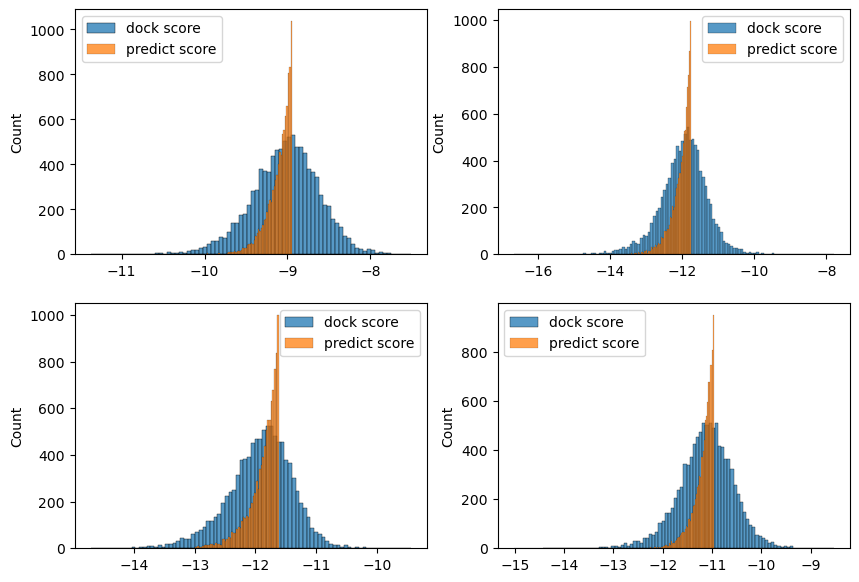

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制分布对比图
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
for i, c in enumerate(complex_name):
    index = (i//2, i%2)
    sns.histplot(final_results[c+'_e'], ax=ax[index], label='dock score')
    sns.histplot(final_results[c+'_p'], ax=ax[index], label='predict score')
    ax[index].legend()
    # plt.savefig(f'{c}_distplot.svg')
plt.show()
    # break


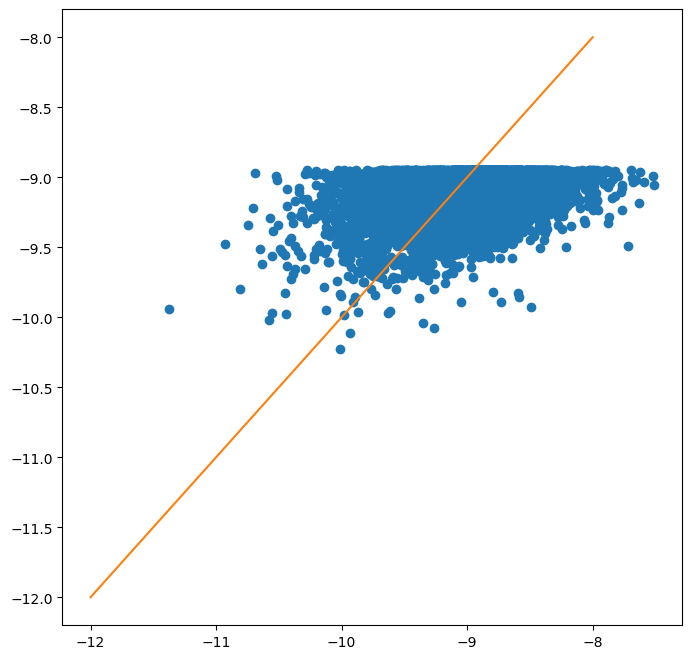

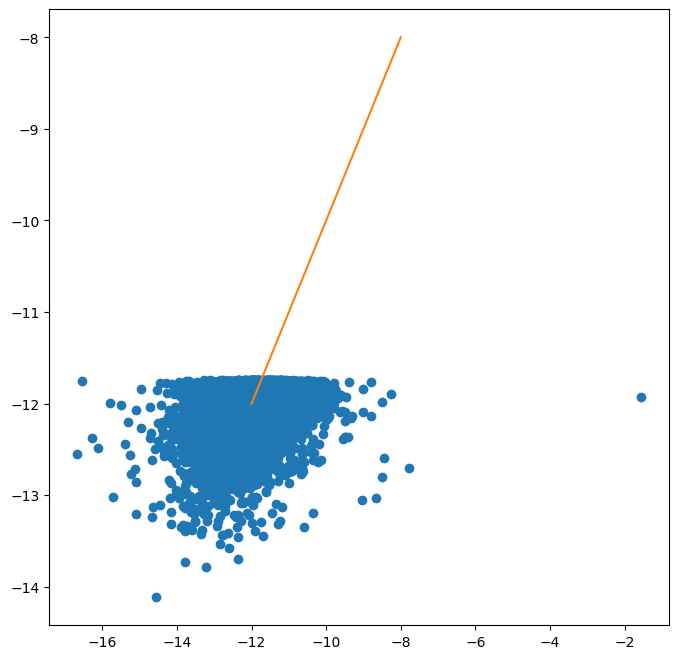

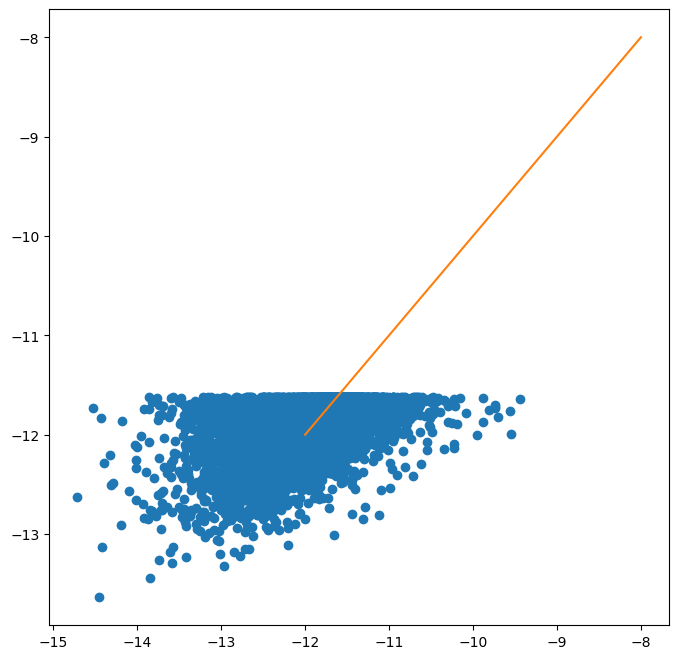

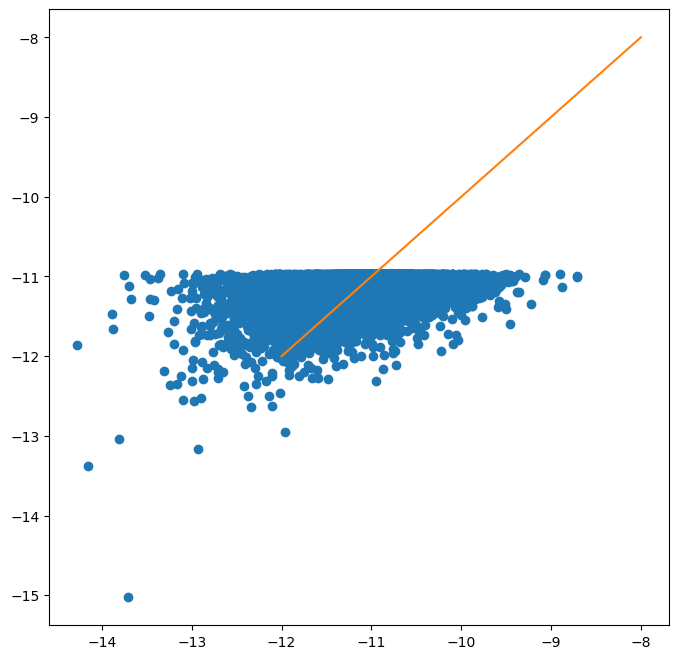

In [21]:
for c in complex_name:
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(final_results[c+'_e'], final_results[c+'_p'], 'o', label='dock score')
    ax.plot([-12, -8], [-12, -8])
    # plt.savefig(f'{c}_scatter.svg')
    plt.show()
    # break